In [1]:
import pandas as pd

In [2]:
library = pd.read_csv("harry.csv")

In [3]:
library.head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,song_title,artist
0,0.50800,0.810,0.619,0.000785,1,0.0866,-4.546,0,0.0393,109.951,0.521,My House (feat. Andrea Obeid),Adam Fine
1,0.39500,0.621,0.463,0.000005,1,0.1280,-10.259,0,0.2430,70.722,0.491,The Wonder Years (feat. Chance the Rapper & Ni...,The O'My's
2,0.00515,0.602,0.856,0.000003,7,0.0980,-5.558,1,0.0458,80.021,0.895,Heat of the Summer,Young the Giant
3,0.01550,0.566,0.587,0.000021,6,0.1110,-5.960,1,0.0308,82.046,0.246,Across The Room (feat. Leon Bridges),ODESZA
4,0.38100,0.438,0.677,0.068600,10,0.1190,-7.535,1,0.1350,167.989,0.214,Beige,Yoke Lore


In [6]:
from sklearn.manifold import TSNE
X = library.drop(['song_title','artist'], axis=1).values
model = TSNE(random_state=0)
fit = pd.DataFrame(model.fit_transform(X))

In [7]:
library['TSNE-X'] = fit[0]
library['TSNE-Y'] = fit[1]

In [ ]:
from matplotlib.pylab import scatter

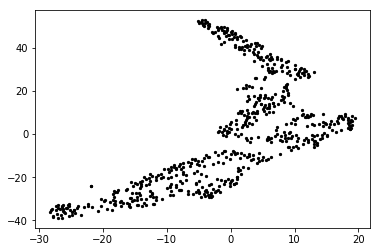

In [9]:
x = library['TSNE-X']
y = library['TSNE-Y']
scatter(x, y,c='black',s=5)

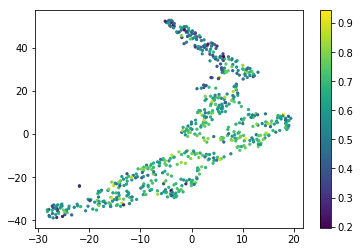

In [23]:
from matplotlib.pyplot import colorbar
c = library['danceability']
p = scatter(x, y,c=c,s=5)
colorbar(p)

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit_predict(X)
library['cluster'] = kmeans

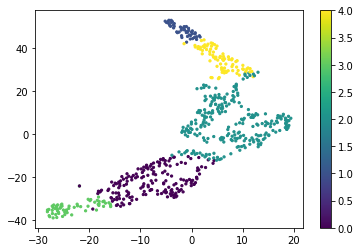

In [14]:
c=library['cluster']
p= scatter(x, y,c=c,s=5)
colorbar(p)

In [15]:
library.groupby(['cluster']).mean()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,TSNE-X,TSNE-Y
cluster,,,,,,,,,,,,,
0,0.216932,0.649874,0.685823,0.040422,5.045714,0.184070,-6.523223,0.714286,0.068109,101.742211,0.487998,-7.646187,-22.226116
1,0.207005,0.486426,0.631872,0.032825,5.468085,0.173443,-6.954234,0.702128,0.101155,180.685255,0.484106,-1.689093,48.095875
2,0.178443,0.653067,0.702941,0.066408,5.389764,0.175304,-6.247902,0.657480,0.060160,123.628937,0.488276,7.728291,5.586559
3,0.371394,0.557613,0.512610,0.070630,4.903226,0.163668,-8.996113,0.725806,0.069895,82.047484,0.455374,-23.039248,-33.979965
4,0.207039,0.528650,0.680962,0.053819,5.325000,0.161361,-6.947475,0.687500,0.076772,148.700362,0.455814,5.789235,34.452290


In [16]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

In [18]:
init_notebook_mode(connected=True)

In [21]:
trace = go.Scatter(
    x = library['TSNE-X'],
    y = library['TSNE-Y'],
    mode = 'markers',
    text = library['song_title'] + " - " + library['artist'],
    marker=dict(
        color = library['cluster'], #set color equal to a variable
        colorscale='Viridis',
        showscale=True
    )
)
data = [trace]
iplot(data)